In [2]:
# 读取基金列表
import pandas as pd
fundlist = pd.read_excel('E:\Project\portfolioanalysis\EquityFundAnalysis\data\equityfund.xlsx',
                         sheet_name='基金列表',
                         dtype={'基金代码':'str'}
                         )
fundlist.head(5)

,基金代码,基金名称
0,000082,嘉实研究阿尔法股票
1,000309,大摩品质生活精选股票
2,000326,南方中小盘成长股票
3,000409,鹏华环保产业股票
4,000411,景顺长城优质成长股票


In [3]:
# 获取基金净值数据
import pandas as pd
from utils import *

EQD = pd.DataFrame()
Column = []

for C in fundlist['基金代码']:
    FI = GetFundInfoByAkshare(fund=C, indicator='累计净值走势')
    FI = FormatData(FI)
    Column.append(C)
    EQD = pd.concat([EQD, FI], axis=1)
    print(C)
EQD.columns = Column

EQD.head(5)

000082
000309
000326
000409
000411
000418
000457
000471
000513
000524
000549
000577
000586
000592
000594
000628
000688
000696
000697
000711
000729
000746
000751
000756
000761
000778
000780
000793
000803
000828
000831
000854
000866
000867
000884
000893
000913
000916
000925
000955
000960
000971
000974
000978
000979
000985
000991
000996
001008
001009
001028
001036
001039
001040
001042
001043
001044
001047
001048
001050
001054
001070
001072
001097
001104
001105
001126
001158
001162
001163
001166
001167
001171
001178
001186
001188
001193
001195
001208
001223
001230
001236
001245
001277
001291
001313
001319
001396
001404
001409
001410
001416
001421
001473
001476
001482
001490
001496
001520
001521
001528
001541
001542
001576
001577
001579
001583
001605
001616
001626
001628
001637
001643
001645
001651
001672
001677
001678
001685
001692
001703
001705
001707
001714
001717
001718
001719
001725
001726
001733
001736
001749
001764
001766
001781
001790
001825
001849
001877
001878
001915
001917
001938

,000082,000309,000326,000409,000411,000418,000457,000471,000513,000524,...,519965,519975,540006,540007,540008,540009,540010,580008,671030,673090
2013-05-28 00:00:00,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.1673,0.8291,1.2921,0.9189,1.2621,1.134,NaN,NaN
2013-05-31 00:00:00,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.1625,0.8270,1.2649,0.9139,1.2650,1.124,NaN,NaN
2013-06-07 00:00:00,0.997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.1120,0.7832,1.2222,0.8736,1.2135,1.075,NaN,NaN
2013-06-14 00:00:00,0.995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.1108,0.7966,1.2628,0.8722,1.2472,1.093,NaN,NaN
2013-06-21 00:00:00,0.990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0838,0.7681,1.2193,0.8515,1.2027,1.049,NaN,NaN


In [4]:
# 切出过去三年基金净值数据
startD = pd.to_datetime('2019-05-10')
endD = pd.to_datetime('2022-06-10')

EQD = EQD.loc[startD:endD,:]
EQD.head(5)

,000082,000309,000326,000409,000411,000418,000457,000471,000513,000524,...,519965,519975,540006,540007,540008,540009,540010,580008,671030,673090
2019-05-10 00:00:00,1.871,1.694,1.1234,1.534,1.472,1.778,1.814,1.718,1.621,1.706,...,1.103,1.153,3.3782,1.1607,1.1276,1.2970,1.6837,1.785,1.1888,1.1081
2019-05-13 00:00:00,1.855,1.673,1.1127,1.516,1.457,1.749,1.788,1.709,1.610,1.696,...,1.089,1.150,3.3087,1.1436,1.1084,1.2891,1.6344,1.755,1.1770,1.0958
2019-05-14 00:00:00,1.848,1.664,1.1048,1.506,1.449,1.740,1.780,1.699,1.596,1.692,...,1.083,1.143,3.3004,1.1388,1.0978,1.2791,1.6183,1.754,1.1693,1.0876
2019-05-15 00:00:00,1.875,1.704,1.1190,1.551,1.474,1.801,1.816,1.732,1.636,1.724,...,1.106,1.157,3.3734,1.1598,1.1182,1.3019,1.6671,1.817,1.1893,1.1177
2019-05-16 00:00:00,1.883,1.711,1.1236,1.550,1.482,1.796,1.816,1.739,1.649,1.731,...,1.114,1.161,3.3657,1.1560,1.1215,1.3070,1.6451,1.836,1.1907,1.1215


In [5]:
# 统计基金数据缺失值
EQD.isnull().sum()

000082    0
000309    0
000326    0
000409    0
000411    0
         ..
540009    0
540010    0
580008    0
671030    0
673090    0
Length: 301, dtype: int64

In [6]:
# 处理基金数据缺失值
EQD.fillna(method='ffill',
           inplace=True)
EQD.dropna(axis=1,
           inplace=True)
EQD.isnull().sum()

000082    0
000309    0
000326    0
000409    0
000411    0
         ..
540009    0
540010    0
580008    0
671030    0
673090    0
Length: 294, dtype: int64

In [11]:
Y = EQD.pct_change().dropna()
Y

,000082,000309,000326,000409,000411,000418,000457,000471,000513,000524,...,519965,519975,540006,540007,540008,540009,540010,580008,671030,673090
2019-05-13,-0.008552,-0.012397,-0.009525,-0.011734,-0.010190,-0.016310,-0.014333,-0.005239,-0.006786,-0.005862,...,-0.012693,-0.002602,-0.020573,-0.014732,-0.017027,-0.006091,-0.029281,-0.016807,-0.009926,-0.011100
2019-05-14,-0.003774,-0.005380,-0.007100,-0.006596,-0.005491,-0.005146,-0.004474,-0.005851,-0.008696,-0.002358,...,-0.005510,-0.006087,-0.002509,-0.004197,-0.009563,-0.007757,-0.009851,-0.000570,-0.006542,-0.007483
2019-05-15,0.014610,0.024038,0.012853,0.029880,0.017253,0.035057,0.020225,0.019423,0.025063,0.018913,...,0.021237,0.012248,0.022119,0.018440,0.018583,0.017825,0.030155,0.035918,0.017104,0.027676
2019-05-16,0.004267,0.004108,0.004111,-0.000645,0.005427,-0.002776,0.000000,0.004042,0.007946,0.004060,...,0.007233,0.003457,-0.002283,-0.003276,0.002951,0.003917,-0.013197,0.010457,0.001177,0.003400
2019-05-17,-0.015401,-0.021040,-0.020559,-0.023871,-0.020243,-0.025612,-0.020374,-0.016676,-0.027289,-0.016176,...,-0.027828,-0.018949,-0.026265,-0.029758,-0.034507,-0.018210,-0.034405,-0.023420,-0.022172,-0.020687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-06,0.015128,0.040611,0.018880,0.043573,0.009927,0.024994,0.021199,0.014104,0.025711,0.019484,...,0.027233,0.021774,0.027084,0.029876,0.056842,0.005010,0.036237,0.025755,0.026876,0.015782
2022-06-07,0.001911,-0.002491,-0.002599,-0.006482,0.006725,-0.005020,-0.005554,-0.000348,0.000295,0.002153,...,0.008061,0.004678,0.008332,0.005007,-0.004935,0.003359,-0.014417,-0.006182,0.005771,0.000640
2022-06-08,0.002288,0.004440,0.000627,0.006333,0.005653,0.010812,-0.001850,0.001043,0.013856,0.008730,...,0.012446,0.005691,0.014417,0.009040,0.019743,0.003618,0.010045,0.008166,0.013327,0.008258
2022-06-09,-0.007991,-0.022376,-0.011526,-0.017925,-0.011753,-0.016164,-0.016857,-0.014246,-0.020355,-0.015644,...,-0.005284,-0.006687,-0.010464,-0.012369,-0.022540,-0.004466,-0.039855,-0.012214,-0.011280,-0.010093


In [13]:
# 股票型基金进行层次聚类分析
import riskfolio as rp

clusters = rp.assets_clusters(returns=Y,
                              codependence='pearson',
                              linkage='DBHT',
                              k = 'None',
                              max_k=12,
                              leaf_order=True)

clusters

ValueError: invalid literal for int() with base 10: 'None'

<AxesSubplot:title={'center':'Assets Dendrogram (Pearson & DBHT linkage)'}>

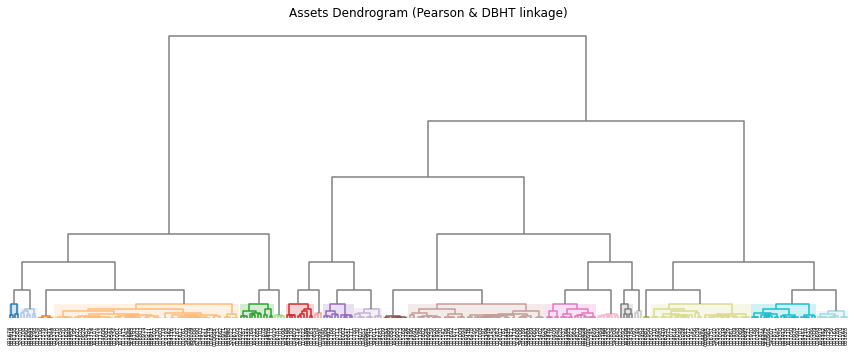

In [9]:
rp.plot_dendrogram(returns=Y,
                   codependence='pearson',
                   linkage='DBHT',
                   k=None,
                   max_k=10,
                   leaf_order=True)